# Predykcja z użyciem ML

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

pd.options.display.max_columns = 50
pd.options.display.max_info_columns = 50
pd.options.display.max_rows = 100
data = pd.read_csv(r"data/cleared_data.csv")
data.drop("Unnamed: 0",inplace=True,axis=1)
data2 = pd.read_csv(r"data/data_after_eda.csv")
data2.drop("Unnamed: 0",inplace=True,axis=1)


# Regresja liniowa/ridge  wrong split


In [2]:
features = data.columns.drop(['MVP','Player','Pos'])
X_train, X_test, y_train, y_test = train_test_split(data, data["MVP"], test_size=0.3, random_state=0)

reg = LinearRegression().fit(X_train[features],y_train)
PredTest = reg.predict(X_test[features])
score = reg.score(X_test[features], y_test)
mse = mean_squared_error(y_test,PredTest)
print(score)
print(mse)

comb = pd.concat([X_test[['Year','Player','MVP']],pd.DataFrame(PredTest,index=X_test.index,columns=["prediction"])],axis=1)
comb.sort_values("prediction",ascending=False).head(20)

comb[comb['Year'] == 2001].sort_values("prediction",ascending=False).head(20)

0.8722407492765423
0.000336459187217987


,Year,Player,MVP,prediction
7375,2001,Anthony Mason,0.0,0.006632
7133,2001,Shareef Abdur-Rahim,0.0,0.004352
7222,2001,Antonio Davis,0.0,0.003430
7279,2001,Brian Grant,0.0,0.003287
7321,2001,Mark Jackson,0.0,0.002684
7403,2001,Cuttino Mobley,0.0,0.002566
7306,2001,Tyrone Hill,0.0,0.002505
7417,2001,Steve Nash,0.0,0.002266
7523,2001,Wally Szczerbiak,0.0,0.002225
7566,2001,Kevin Willis,0.0,0.002221


In [ ]:
from sklearn.linear_model import Ridge
reg = Ridge().fit(X_train[features],y_train)
PredTest = reg.predict(X_test[features])
print( reg.score(X_test[features], y_test) )
print(mean_squared_error(y_test,PredTest))

#reg.coef_

comb = pd.concat([X_test[['Year','Player','MVP']],pd.DataFrame(PredTest,index=X_test.index,columns=["prediction"])],axis=1)
comb.sort_values("prediction",ascending=False).head(20)


# Regresja Logistyczna / random forest , wrong split


In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 10000).fit(X_train[features],y_train)


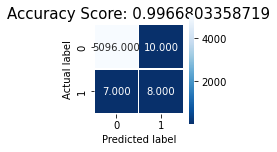

In [14]:
predictions = clf.predict(X_test[features])
score = clf.score(X_test[features], y_test) 
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

features = data.columns.drop(['MVP','Player','Pos'])
X_train, X_test, y_train, y_test = train_test_split(data, data["MVP"], test_size=0.5, random_state=15)

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train[features], y_train)
predictions = forest.predict(X_test[features])
score = forest.score(pd.DataFrame(X_test[features]), y_test)
mse = mean_squared_error(y_test,predictions)
print(score,mse)


0.99800796812749 0.00199203187250996


0.99800796812749 0.00199203187250996


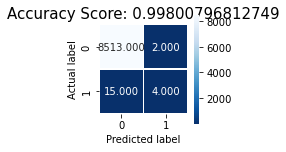

In [18]:
print(score,mse)

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

# Dobre

## OLD

In [2]:

data_back = data.copy()
data_back['id'] = data_back.index

from sklearn.ensemble import RandomForestClassifier

years = range(2000, 2022)
mvp_years = dict()
results_mvp = pd.DataFrame(columns = ['id', 'Year', 'MVP'])

for y in years :
    train = data_back[data_back.Year < y]
    test = data_back[data_back.Year == y]
    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP'], axis=1)
    y_train = train['MVP']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP'], axis=1)
    
    # Random Forest

    random_forest = RandomForestClassifier(n_estimators=10)
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    random_forest.score(X_train, y_train)
    acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
    
    pred_proba = random_forest.predict_proba(X_test)
    
    y_pred_proba = []
    for i in enumerate(pred_proba):
        y_pred_proba.append(i[1][1])
    y_pred_proba = np.asarray(y_pred_proba)
    
    mvp_years = pd.DataFrame({
        "id": test["id"],
        "Year": y,
        "MVP": y_pred_proba
        })
    
    results_mvp = pd.concat([results_mvp, mvp_years])

results_mvp['id'] = results_mvp['id'].astype('int')
career_player = data_back[['id', 'Player','MVP']]
results_mvp = results_mvp.merge(career_player, on='id')

results_mvp = results_mvp.drop_duplicates()
results_mvp = results_mvp.sort_values(by='MVP_x', ascending=False)

## New

100%|██████████| 13/13 [00:25<00:00,  1.97s/it]


Brier Score:  0.001300134667713717
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6504
         1.0       0.56      0.38      0.45        13

    accuracy                           1.00      6517
   macro avg       0.78      0.69      0.73      6517
weighted avg       1.00      1.00      1.00      6517

       Year                 Player  MVP  MVP_pred_proba  Rank
11375  2010           LeBron James  1.0        0.571108   1.0
11951  2011           Derrick Rose  1.0        0.007797   3.0
12280  2012           LeBron James  1.0        0.328961   1.0
12736  2013           LeBron James  1.0        0.971386   1.0
13126  2014           Kevin Durant  1.0        0.086323   3.0
13585  2015          Stephen Curry  1.0        0.148024   3.0
14070  2016          Stephen Curry  1.0        0.965936   1.0
14899  2017      Russell Westbrook  1.0        0.191430   1.0
15122  2018           James Harden  1.0        0.360524   1.0
15485  2019  Giann

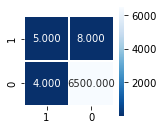

In [29]:
from tqdm import tqdm
data_back = data.copy()
data_back['id'] = data_back.index

from warnings import simplefilter
# ignore all warnings
simplefilter(action='ignore')

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier,set_config
set_config(verbosity = 0)

years = range(2010, 2023)
predictions = pd.DataFrame()

for y in tqdm(years) :
    train = data_back[data_back.Year < y]
    test = data_back[data_back.Year == y]

    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_train = train['MVP']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_test = test['MVP']

    #random_forest = RandomForestClassifier(max_depth=2, random_state=0)
    random_forest = XGBClassifier(use_label_encoder=False,max_delta_step = 3)
    random_forest.fit(X_train, y_train)
    pred_proba = pd.DataFrame(random_forest.predict_proba(X_test),columns=["No-MVP","MVP_pred_proba"])
    pred = random_forest.predict(X_test)

    results = test.copy()
    results["MVP_pred_proba"] = pred_proba["MVP_pred_proba"].values
    results["MVP_pred"] = pred
    results = results.sort_values(by="MVP_pred_proba",ascending=False)
    results["Rank"] =results["MVP_pred_proba"].rank(ascending=False,method="min")
    predictions = predictions.append(results)
    

brier = brier_score_loss(predictions['MVP'],predictions['MVP_pred_proba'])

print("Brier Score: ",brier)


print(classification_report(predictions['MVP'],predictions['MVP_pred']))

cm = pd.DataFrame(confusion_matrix(predictions['MVP'],predictions['MVP_pred'],labels=[1,0]),index=[1,0],columns=[1,0])
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

rank_predictions = predictions.loc[predictions['MVP'] == 1,["Year","Player","MVP","MVP_pred_proba","Rank"]]

first_place = rank_predictions.loc[rank_predictions.Rank == 1.0,'Rank'].count() / len(years) * 100
second_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0]),'Rank'].count() / len(years) * 100
third_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0,3.0]),'Rank'].count() / len(years) * 100

print(rank_predictions)

print("Skuteczność predykcji pierwszego miejsca: ",first_place,"%")
print("Skuteczność predykcji minimum drugiego miejsca: ",second_place,"%")
print("Skuteczność predykcji minimum trzeciego miejsca: ",third_place,"%")


100%|██████████| 13/13 [00:05<00:00,  2.19it/s]


Brier Score:  0.004662064484368064
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1492
         1.0       0.70      0.54      0.61        13

    accuracy                           0.99      1505
   macro avg       0.85      0.77      0.80      1505
weighted avg       0.99      0.99      0.99      1505

      Year                 Player  MVP  MVP_pred_proba  Rank
3286  2010           LeBron James  1.0        0.814905   1.0
3461  2011           Derrick Rose  1.0        0.015124   3.0
3537  2012           LeBron James  1.0        0.521563   1.0
3640  2013           LeBron James  1.0        0.969348   1.0
3738  2014           Kevin Durant  1.0        0.150374   2.0
3851  2015          Stephen Curry  1.0        0.082984   3.0
3967  2016          Stephen Curry  1.0        0.902272   1.0
4169  2017      Russell Westbrook  1.0        0.611092   1.0
4230  2018           James Harden  1.0        0.378685   1.0
4303  2019  Giannis Antetoko

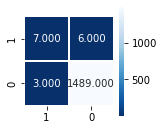

In [30]:
from tqdm import tqdm
data_back = data2.copy()
data_back['MVP'] = round(data_back['MVP'])
data_back['id'] = data_back.index

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier,set_config
set_config(verbosity = 0)

years = range(2010, 2023)
predictions = pd.DataFrame()

for y in tqdm(years) :
    train = data_back[(data_back.Year < y) & (data_back.is_smote == False) ]
    test = data_back[(data_back.Year == y) & (data_back.is_smote == False) ]

    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first','is_smote'], axis=1)
    y_train = train['MVP']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first','is_smote'], axis=1)
    y_test = test['MVP']

    #random_forest = RandomForestClassifier(max_depth=2, random_state=0)
    random_forest = XGBClassifier(use_label_encoder=False,max_delta_step = 3)
    random_forest.fit(X_train, y_train)
    pred_proba = pd.DataFrame(random_forest.predict_proba(X_test),columns=["No-MVP","MVP_pred_proba"])
    pred = random_forest.predict(X_test)

    results = test.copy()
    results["MVP_pred_proba"] = pred_proba["MVP_pred_proba"].values
    results["MVP_pred"] = pred
    results = results.sort_values(by="MVP_pred_proba",ascending=False)
    results["Rank"] =results["MVP_pred_proba"].rank(ascending=False,method="min")
    predictions = predictions.append(results)
    
brier = brier_score_loss(predictions['MVP'],predictions['MVP_pred_proba'])
print("Brier Score: ",brier)

print(classification_report(predictions['MVP'],predictions['MVP_pred']))

cm = pd.DataFrame(confusion_matrix(predictions['MVP'],predictions['MVP_pred'],labels=[1,0]),index=[1,0],columns=[1,0])
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

rank_predictions = predictions.loc[predictions['MVP'] == 1,["Year","Player","MVP","MVP_pred_proba","Rank"]]

first_place = rank_predictions.loc[rank_predictions.Rank == 1.0,'Rank'].count() / len(years)
second_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0]),'Rank'].count() / len(years)
third_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0,3.0]),'Rank'].count() / len(years)

print(rank_predictions)

print("Skuteczność predykcji pierwszego miejsca: ",first_place,"%")
print("Skuteczność predykcji minimum drugiego miejsca: ",second_place,"%")
print("Skuteczność predykcji minimum trzeciego miejsca: ",third_place,"%")

100%|██████████| 23/23 [00:20<00:00,  1.15it/s]


Brier Score:  0.0021112434008379445
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2714
         1.0       0.94      0.70      0.80        23

    accuracy                           1.00      2737
   macro avg       0.97      0.85      0.90      2737
weighted avg       1.00      1.00      1.00      2737

      Year                 Player  MVP  MVP_pred_proba  Rank
2066  2000       Shaquille O'Neal  1.0        0.974422   1.0
2149  2001          Allen Iverson  1.0        0.010950   1.0
2248  2002             Tim Duncan  1.0        0.996085   1.0
2368  2003             Tim Duncan  1.0        0.992395   1.0
2500  2004          Kevin Garnett  1.0        0.915364   1.0
2676  2005             Steve Nash  1.0        0.287442   2.0
2797  2006             Steve Nash  1.0        0.003149   5.0
2926  2007          Dirk Nowitzki  1.0        0.249641   1.0
2981  2008            Kobe Bryant  1.0        0.017632   1.0
3154  2009           LeBron

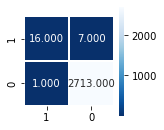

In [47]:
from tqdm import tqdm
data_back = data2.copy()
data_back['MVP'] = round(data_back['MVP'])
data_back['id'] = data_back.index

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier,set_config
set_config(verbosity = 0)

years = range(2000, 2023)
predictions = pd.DataFrame()

for y in tqdm(years) :
    train = data_back[(data_back.Year < y)]
    test = data_back[(data_back.Year == y) & (data_back.is_smote == False) ]

    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first','is_smote'], axis=1)
    y_train = train['MVP']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first','is_smote'], axis=1)
    y_test = test['MVP']

    #random_forest = RandomForestClassifier(max_depth=2, random_state=0)
    random_forest = XGBClassifier(use_label_encoder=False,max_delta_step = 3)
    random_forest.fit(X_train, y_train)
    pred_proba = pd.DataFrame(random_forest.predict_proba(X_test),columns=["No-MVP","MVP_pred_proba"])
    pred = random_forest.predict(X_test)

    results = test.copy()
    results["MVP_pred_proba"] = pred_proba["MVP_pred_proba"].values
    results["MVP_pred"] = pred
    results = results.sort_values(by="MVP_pred_proba",ascending=False)
    results["Rank"] =results["MVP_pred_proba"].rank(ascending=False,method="min")
    predictions = predictions.append(results)
    
brier = brier_score_loss(predictions['MVP'],predictions['MVP_pred_proba'])
print("Brier Score: ",brier)

print(classification_report(predictions['MVP'],predictions['MVP_pred']))

cm = pd.DataFrame(confusion_matrix(predictions['MVP'],predictions['MVP_pred'],labels=[1,0]),index=[1,0],columns=[1,0])
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

rank_predictions = predictions.loc[predictions['MVP'] == 1,["Year","Player","MVP","MVP_pred_proba","Rank"]]

first_place = rank_predictions.loc[rank_predictions.Rank == 1.0,'Rank'].count() / len(years) * 100
second_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0]),'Rank'].count() / len(years) * 100
third_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0,3.0]),'Rank'].count() / len(years) * 100

print(rank_predictions)

print("Skuteczność predykcji pierwszego miejsca: ",first_place,"%")
print("Skuteczność predykcji minimum drugiego miejsca: ",second_place,"%")
print("Skuteczność predykcji minimum trzeciego miejsca: ",third_place,"%")

In [44]:
from tqdm import tqdm
data_back = data.copy()
data_back['id'] = data_back.index

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import brier_score_loss

years = range(2010, 2023)
predictions = pd.DataFrame()

for y in tqdm(years) :
    train = data_back[data_back.Year < y ]
    test = data_back[data_back.Year == y ]

    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_train = train['award_share']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_test = test['award_share']

    #random_forest = XGBRegressor(objective='reg:squarederror', random_state=0)
    random_forest = RandomForestRegressor(max_depth=2, random_state=0)
    random_forest.fit(X_train, y_train)
    pred = random_forest.predict(X_test)

    results = test.copy()
    results["MVP_pred"] = pred
    results = results.sort_values(by="MVP_pred",ascending=False)
    results["Rank"] =results["MVP_pred"].rank(ascending=False,method="min")
    predictions = predictions.append(results)
    
mse = mean_squared_error(predictions['MVP'],predictions['MVP_pred'])
mae = mean_absolute_error(predictions['MVP'],predictions['MVP_pred'])
print("MSE:",mse)
print("MAE:",mae)

rank_predictions = predictions.loc[predictions['MVP'] == 1,["Year","Player","MVP","Rank"]]
first_place = rank_predictions.loc[rank_predictions.Rank == 1.0,'Rank'].count() / len(years) * 100
second_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0]),'Rank'].count() / len(years) * 100
third_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0,3.0]),'Rank'].count() / len(years) * 100
print(rank_predictions)
print("Skuteczność predykcji pierwszego miejsca: ",first_place,"%")
print("Skuteczność predykcji minimum drugiego miejsca: ",second_place,"%")
print("Skuteczność predykcji minimum trzeciego miejsca: ",third_place,"%")


100%|██████████| 13/13 [01:11<00:00,  5.49s/it]

MSE: 0.0012962396525735018
MAE: 0.00465192609028193
       Year                 Player  MVP  Rank
11375  2010           LeBron James  1.0   1.0
11951  2011           Derrick Rose  1.0   5.0
12280  2012           LeBron James  1.0   1.0
12736  2013           LeBron James  1.0   1.0
13126  2014           Kevin Durant  1.0   1.0
13585  2015          Stephen Curry  1.0   2.0
14070  2016          Stephen Curry  1.0   1.0
14899  2017      Russell Westbrook  1.0   4.0
15122  2018           James Harden  1.0   1.0
15485  2019  Giannis Antetokounmpo  1.0   2.0
16010  2020  Giannis Antetokounmpo  1.0   2.0
16789  2021           Nikola Jokić  1.0   1.0
17356  2022           Nikola Jokić  1.0   1.0
Skuteczność predykcji pierwszego miejsca:  61.53846153846154 %
Skuteczność predykcji minimum drugiego miejsca:  84.61538461538461 %
Skuteczność predykcji minimum trzeciego miejsca:  84.61538461538461 %


In [42]:
from tqdm import tqdm
data_back = data2.copy()
data_back['id'] = data_back.index

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import brier_score_loss

years = range(2010, 2023)
predictions = pd.DataFrame()

for y in tqdm(years) :
    train = data_back[(data_back.Year < y) & (data_back.is_smote == False) ]
    test = data_back[(data_back.Year == y) & (data_back.is_smote == False) ]

    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_train = train['award_share']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_test = test['award_share']

    #random_forest = XGBRegressor(objective='reg:squarederror', random_state=0)
    random_forest = RandomForestRegressor(max_depth=2, random_state=0)
    random_forest.fit(X_train, y_train)
    pred = random_forest.predict(X_test)

    results = test.copy()
    results["MVP_pred"] = pred
    results = results.sort_values(by="MVP_pred",ascending=False)
    results["Rank"] =results["MVP_pred"].rank(ascending=False,method="min")
    predictions = predictions.append(results)
    
mse = mean_squared_error(predictions['MVP'],predictions['MVP_pred'])
mae = mean_absolute_error(predictions['MVP'],predictions['MVP_pred'])
print("MSE:",mse)
print("MAE:",mae)

rank_predictions = predictions.loc[predictions['MVP'] == 1,["Year","Player","MVP","Rank"]]
first_place = rank_predictions.loc[rank_predictions.Rank == 1.0,'Rank'].count() / len(years) * 100
second_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0]),'Rank'].count() / len(years) * 100
third_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0,3.0]),'Rank'].count() / len(years) * 100
print(rank_predictions)
print("Skuteczność predykcji pierwszego miejsca: ",first_place,"%")
print("Skuteczność predykcji minimum drugiego miejsca: ",second_place,"%")
print("Skuteczność predykcji minimum trzeciego miejsca: ",third_place,"%")

100%|██████████| 13/13 [00:24<00:00,  1.88s/it]

MSE: 0.006741246851824197
MAE: 0.02553570728016874
      Year                 Player  MVP  Rank
3286  2010           LeBron James  1.0   1.0
3461  2011           Derrick Rose  1.0   6.0
3537  2012           LeBron James  1.0   1.0
3640  2013           LeBron James  1.0   1.0
3738  2014           Kevin Durant  1.0   1.0
3851  2015          Stephen Curry  1.0   2.0
3967  2016          Stephen Curry  1.0   1.0
4169  2017      Russell Westbrook  1.0   2.0
4230  2018           James Harden  1.0   1.0
4303  2019  Giannis Antetokounmpo  1.0   2.0
4418  2020  Giannis Antetokounmpo  1.0   2.0
4559  2021           Nikola Jokić  1.0   1.0
4677  2022           Nikola Jokić  1.0   1.0
Skuteczność predykcji pierwszego miejsca:  61.53846153846154 %
Skuteczność predykcji minimum drugiego miejsca:  92.3076923076923 %
Skuteczność predykcji minimum trzeciego miejsca:  92.3076923076923 %


In [46]:
from tqdm import tqdm
data_back = data2.copy()
data_back['id'] = data_back.index

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import brier_score_loss

years = range(2000, 2023)
predictions = pd.DataFrame()

for y in tqdm(years) :
    train = data_back[(data_back.Year < y) ]
    test = data_back[(data_back.Year == y) & (data_back.is_smote == False) ]

    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_train = train['award_share']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_test = test['award_share']

    random_forest = XGBRegressor(objective='reg:squarederror', random_state=0)
    #random_forest = RandomForestRegressor(max_depth=2, random_state=0)
    random_forest.fit(X_train, y_train)
    pred = random_forest.predict(X_test)

    results = test.copy()
    results["MVP_pred"] = pred
    results = results.sort_values(by="MVP_pred",ascending=False)
    results["Rank"] =results["MVP_pred"].rank(ascending=False,method="min")
    predictions = predictions.append(results)
    
mse = mean_squared_error(predictions['MVP'],predictions['MVP_pred'])
mae = mean_absolute_error(predictions['MVP'],predictions['MVP_pred'])
print("MSE:",mse)
print("MAE:",mae)

rank_predictions = predictions.loc[predictions['MVP'] == 1,["Year","Player","MVP","Rank"]]
first_place = rank_predictions.loc[rank_predictions.Rank == 1.0,'Rank'].count() / len(years) * 100
second_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0]),'Rank'].count() / len(years) * 100
third_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0,3.0]),'Rank'].count() / len(years) * 100
print(rank_predictions)
print("Skuteczność predykcji pierwszego miejsca: ",first_place,"%")
print("Skuteczność predykcji minimum drugiego miejsca: ",second_place,"%")
print("Skuteczność predykcji minimum trzeciego miejsca: ",third_place,"%")

100%|██████████| 23/23 [00:54<00:00,  2.36s/it]

MSE: 0.008498323898250714
MAE: 0.0247517143487648
      Year                 Player  MVP  Rank
2066  2000       Shaquille O'Neal  1.0   1.0
2149  2001          Allen Iverson  1.0   4.0
2248  2002             Tim Duncan  1.0   1.0
2368  2003             Tim Duncan  1.0   1.0
2500  2004          Kevin Garnett  1.0   1.0
2676  2005             Steve Nash  1.0   7.0
2797  2006             Steve Nash  1.0   6.0
2926  2007          Dirk Nowitzki  1.0   1.0
2981  2008            Kobe Bryant  1.0   5.0
3154  2009           LeBron James  1.0   1.0
3286  2010           LeBron James  1.0   1.0
3461  2011           Derrick Rose  1.0   1.0
3537  2012           LeBron James  1.0   1.0
3640  2013           LeBron James  1.0   1.0
3738  2014           Kevin Durant  1.0   1.0
3851  2015          Stephen Curry  1.0   1.0
3967  2016          Stephen Curry  1.0   1.0
4169  2017      Russell Westbrook  1.0   1.0
4230  2018           James Harden  1.0   1.0
4303  2019  Giannis Antetokounmpo  1.0   1.0
4418 

# Best Model


In [ ]:
from tqdm import tqdm
data_back = data2.copy()
data_back['id'] = data_back.index

from xgboost import XGBClassifier,set_config
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
set_config(verbosity = 0)


years = range(2010, 2023)
predictions = pd.DataFrame()

for y in tqdm(years) :
    train = data_back[(data_back.Year < y) & (data_back.is_smote == False) ]
    test = data_back[(data_back.Year == y) & (data_back.is_smote == False) ]

    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first','is_smote'], axis=1)
    y_train = train['MVP']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first','is_smote'], axis=1)
    y_test = test['MVP']

    random_forest = XGBClassifier(use_label_encoder=False,max_delta_step = 3)
    random_forest.fit(X_train, y_train)
    pred_proba = pd.DataFrame(random_forest.predict_proba(X_test),columns=["No-MVP","MVP_pred_proba"])
    pred = random_forest.predict(X_test)
    #acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

    results = test.copy()
    results["MVP_pred_proba"] = pred_proba["MVP_pred_proba"].values
    results["MVP_pred"] = pred
    results = results.sort_values(by="MVP_pred_proba",ascending=False)
    results["Rank"] =results["MVP_pred_proba"].rank(ascending=False,method="min")
    results["MVP_pred_rank1"] = results['Rank'].where(results['Rank'] == 1, 0)
    predictions = predictions.append(results)
    
mse = mean_squared_error(predictions['MVP'],predictions['MVP_pred_proba'])
acc = accuracy_score(predictions['MVP'],predictions['MVP_pred_rank1'])
print("MSE:",mse)
print("ACC:",acc)

print(classification_report(predictions['MVP'],predictions["MVP_pred_rank1"]))

cm = pd.DataFrame(confusion_matrix(predictions['MVP'],predictions["MVP_pred_rank1"],labels=[1,0]),index=[1,0],columns=[1,0])
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

rank_predictions = predictions.loc[predictions['MVP'] == 1,["Year","Player","MVP","MVP_pred_proba","Rank"]]

first_place = rank_predictions.loc[rank_predictions.Rank == 1.0,'Rank'].count() / len(years)
second_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0]),'Rank'].count() / len(years)
third_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0,3.0]),'Rank'].count() / len(years)

print(rank_predictions)

print("First place predictions: ",first_place,"%")
print("Second or best place predictions: ",second_place,"%")
print("Third or best place predictions: ",third_place,"%")


feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print("Feature importance:")                                   
feature_importances.head(10)


In [2]:
import pandas as pd
S1 = pd.Series([1,2,3,4,5,6,20,23,23,25])
S2 = pd.Series(['A','B','A','B','A','B','A','B','A','B'])
S3 = pd.Series([5,9,6,9,7,8,9,7,9,8])
xd = pd.concat([S1,S2,S3],axis = 1)
xd.columns = ['col1','col2','col3']
xd.loc[(xd['col1'] == 23 ) & (xd['col3'] < 8)]

,col1,col2,col3
7,23,B,7
